In [1]:
from planetengine.frame import Frame
from planetengine.frame import load_frame
from planetengine import initials
from planetengine import shapes

In [2]:
outputPath = '/workspace/user_data/data/tests'

In [3]:
from modelscripts import isovisc_systemscript
from modelscripts import isovisc_observerscript

In [4]:
initial = {
    'temperatureField': initials.sinusoidal.IC(
        boundaries = (0.12, 1.12, '.', '.'),
        valRange = (0.12, 1.12)
        )
    }

In [5]:
isovisc = Frame(
    isovisc_systemscript.build(res = 8, Ra = 1e5, f = 1.),
    isovisc_observerscript.build(),
    initial = initial,
    outputPath = outputPath
    )

Initialising...
Initialisation complete!


Reporting...
Analysing...
Analysis complete!
avTemp 0.62
modeltime 0.0E+00
Nu 1.1
step 0
surfVRMS 355.36
VRMS 354.22
fig



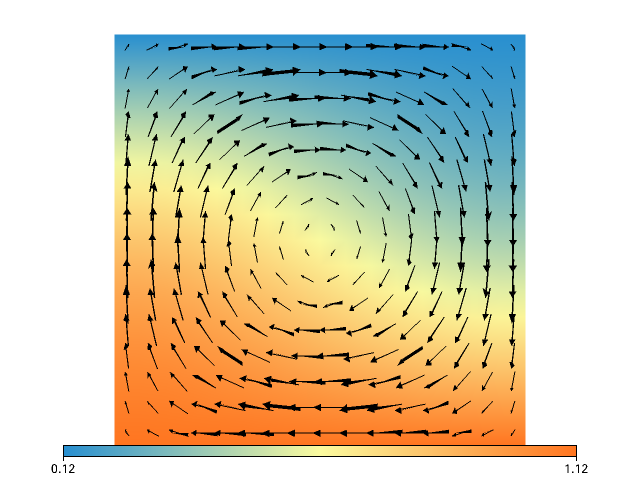

Reporting complete!


In [6]:
isovisc.report()

In [7]:
from modelscripts import MS98X_systemscript
from modelscripts import MS98X_observerscript

In [8]:
initial = {
    'temperatureField': initials.load.IC(isovisc, 'temperatureField'),
    'materialVar': initials.extents.IC((1, shapes.trapezoid(longwidth = 0.5, lengthRatio = 0.9)))
    }

Loading checkpoint...
Already at step  0  - aborting load_checkpoint.


In [9]:
MS98X = Frame(
    MS98X_systemscript.build(res = 32, heating = 0., aspect = 2., f = 1.),
    MS98X_observerscript.build(),
    initial = initial,
    outputPath = outputPath
    )

Collecting...
Initialising...
Mapping achieved at tolerance = 1e-05
Initialisation complete!


Reporting...
Analysing...
Analysis complete!
avTemp 0.62
avVisc 4.9E+03
modeltime 0.0E+00
Nu 1.1
step 0
surfVRMS 28.11
VRMS 185.90
yielding 6%
fig



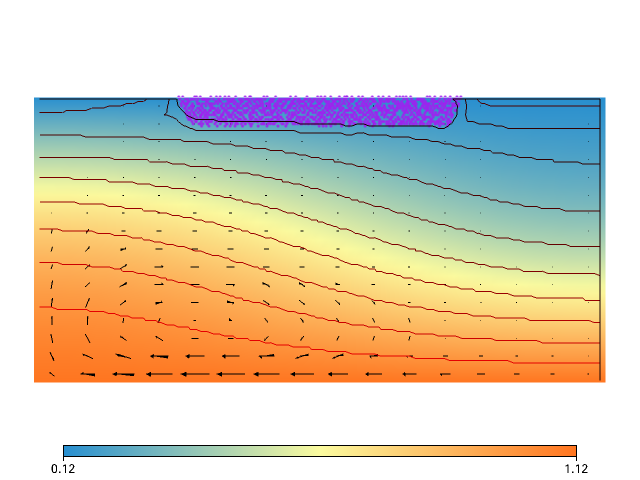

Reporting complete!


In [10]:
MS98X.report()